In [12]:
from pydub import AudioSegment

def downsize_wav(input_path, output_path, target_bitrate):
    # Load the audio file
    audio = AudioSegment.from_file(input_path)

    # Set the target bitrate
    audio = audio.set_frame_rate(target_bitrate)

    # Export the downsized audio to the output file
    audio.export(output_path, format="wav")

# Example usage
input_wav_path = "output.wav"
output_wav_path = "output.wav"
target_bitrate = 16000  # Set your desired bitrate

downsize_wav(input_wav_path, output_wav_path, target_bitrate)

In [17]:
import os
import requests
from pydub import AudioSegment
import urllib3
import json
import base64

api_key =
api_url =

def split_and_transcribe(audio_file_path):
    # 음성 파일을 5초 간격으로 분할
    audio = AudioSegment.from_file(audio_file_path, format="wav")
    interval = 10 * 1000  # milliseconds
    chunks = [audio[i:i + interval] for i in range(0, len(audio), interval)]

    for i, chunk in enumerate(chunks):
        chunk.export(f"chunk_{i+1}.wav", format="wav")
        transcribe_audio(f"chunk_{i+1}.wav")

def transcribe_audio(file_path):
    # ETRI 음성 인식 API 호출
    with open(file_path, 'rb') as audio_file:
        audio_content = base64.b64encode(audio_file.read()).decode('utf-8')
    audio_file.close()

    request_json = {
        "argument": {
            "language_code": "korean",
            "audio": audio_content
        }
    }

    http = urllib3.PoolManager()
    response = http.request(
        "POST",
        api_url,
        headers={"Content-Type": "application/json; charset=UTF-8", "Authorization": api_key},
        body=json.dumps(request_json)
    )

    # API 응답 처리
    print(f"File: {file_path}")
    print("Response: "+str(response.data,"utf-8"))
    print(response.data)

    os.remove(file_path)
    print(f"File {file_path} deleted.")

if __name__ == "__main__":
    audio_file_path = "./output.wav"
    split_and_transcribe(audio_file_path)

File: chunk_1.wav
Response: {"result":0,"return_type":"com.google.gson.internal.LinkedTreeMap","return_object":{"recognized":"안녕하세요, 페스트 포크스 포를 스타 최요은입니다."}}
b'{"result":0,"return_type":"com.google.gson.internal.LinkedTreeMap","return_object":{"recognized":"\xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94, \xed\x8e\x98\xec\x8a\xa4\xed\x8a\xb8 \xed\x8f\xac\xed\x81\xac\xec\x8a\xa4 \xed\x8f\xac\xeb\xa5\xbc \xec\x8a\xa4\xed\x83\x80 \xec\xb5\x9c\xec\x9a\x94\xec\x9d\x80\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."}}'
File chunk_1.wav deleted.


KeyboardInterrupt: 

In [31]:
import json
import requests

config = {}
resp = requests.post(
    'https://openapi.vito.ai/v1/transcribe',
    headers={'Authorization': 'bearer '+resp.json()['access_token']},
    data={'config': json.dumps(config)},
    files={'file': open('output.wav', 'rb')}
)
resp.raise_for_status()
print(resp.json())
transcribe_id = resp.json()['id']

{'id': 'rcw0sfVmRyGoox2PErxEpA'}


In [52]:
import requests
import time

def check_transcribe_status(transcribe_id, access_token):
    while True:
        resp = requests.get(
            'https://openapi.vito.ai/v1/transcribe/'+transcribe_id,
            headers={'Authorization': 'bearer '+ access_token},
        )
        resp.raise_for_status()
        response_json = resp.json()

        status = response_json.get('status', '')

        if status == 'completed':
            for i in resp.json()['results']['utterances']:
                print(i['msg'])
            break
        elif status == 'transcribing':
            print('Transcribing...')
        else:
            print(f'Unexpected status: {status}')

        time.sleep(5)

check_transcribe_status(transcribe_id, access_token)


안녕하세요, 파스텔 커피, 워스, 바리스타 정혜원입니다.
이번 영상에서는 파스텔 커피웍스가 투가식으로 따뜻한 브리잉을 어떻게 내리는지 소개해 드리려고 합니다.
저희 매장에서는 하리오 스위치 드리퍼를 사용해서 보통 침지식으로 커피를 추출을 하고 있지만, 처음부터 스위치를 내려서 사용하시게 되면은 투가식으로도 커피를 추출해 내실 수 있어요.
보통 사용하시는 드리퍼가 하리오의 브이식 스트시거나 아니면 나눠서 투가식으로 커피를 추출하시는 분들에게는 이 방법을 권장해 드립니다.
오늘 함께 추출해 볼 커피는 저희 언스페셜티 블랜드 프루티 버전 투입니다. 추출해 사용할 원도의 양은 총 19g입니다.
군세도는 2, K 43, S 기준으로 11입니다.
문쇄한 커피를 담기 전에는 꼭 드리퍼와 서버를 결합을 해주시고, 종이 필터를 넣은 채 린싱을 진행해 주세요.
종이 필터 린싱을 해주시게 되시면 종이 필터 냄새를 제거할 수도 있고.
또 저희가 목적으로 하고 있는 이 92도의 온도가 내려가지 않도록 방지하는 효과를 줄 수 있습니다.
이 커피 성분이 필터에 협착되는 것을 방지할 수 있어요.
충분히 린싱이 되었으면 물을 버리고 다시 드리퍼와 서버를 결합을 해주시고요.
이번에는 추가식으로 진행할 거기 때문에 스위치가 내려져 있는지 꼭 확인을 해주세요.
그리 분쇄한 커피 18g을 담도록 하겠습니다. 커피 표면을 드리퍼를 살짝 흔들어서 평평하게 해주시고요.
이제 너무 드리퍼를 세게 흔드는 것보다는 가볍게 2, 3회 정도 흔들어서 평평하게 만들어 주시는 것을 추천해 드립니다.
저울 영 점을 잡으시고요. 92 도의 추출수를 준비를 해주세요.
뜸은 30g의 물을 가지고 30초 동안 드리도록 하겠습니다.
그리고 1차 포어는 30초가 지나면 100g의 물을 추가적으로 보어주도록 하겠습니다.
30초가 지나고 1분이 되었을 때 다시 100g의 불을 추가적으로 부어지도록 하겠습니다.
1분 30초가 되면은 마지막으로 50g을 부어줄 텐데요. 이때는 가운데에서 물을 부어주시면 되겠습니다.
그래서 280 이 

In [69]:
from pydub import AudioSegment

def split_mp3(input_file, output_prefix, interval=5000):
    try:
        audio = AudioSegment.from_file(input_file, "mp3")
    except:
        audio = AudioSegment.from_file(input_file, format="mp4")

    # Calculate the number of segments
    num_segments = len(audio) // interval + 1

    for i in range(num_segments):
        start_time = i * interval
        end_time = (i + 1) * interval
        segment = audio[start_time:end_time]

        output_file = f"{output_prefix}_segment_{i + 1}.mp3"
        segment.export(output_file, format="mp3")

if __name__ == "__main__":
    input_mp3 = "핸드드립이 불티나게 팔리는 카페의 추출 레시피를 공개합니다 (핫아이스).mp3"
    output_prefix = "output_segment"

    split_mp3(input_mp3, output_prefix, interval=5000)


In [49]:
from pytube import YouTube
import os

link = input("youtube url")

yt = YouTube(link)
mp4_file_path = yt.streams.filter(only_audio=True).first().download()
file_path = mp4_file_path.replace('mp4','mp3')
os.rename(mp4_file_path, file_path)
os.rename(file_path, "your_input_file.mp3")

youtube url https://www.youtube.com/watch?v=QrFYMtP0cRo&list=PLUAYxJFHd-c72PAaPx416sJ9jUlBKWojt&index=2


In [50]:
from pydub import AudioSegment

def cut_mp3(input_file, output_files, durations):
    try:
        audio = AudioSegment.from_file(input_file, "mp3")
    except:
        audio = AudioSegment.from_file(input_file, format="mp4")

    if len(output_files) != len(durations):
        raise ValueError("Number of output files should match the number of durations.")

    start = times[0] *1000
    for i, duration in enumerate(durations):
        end = start + duration * 1000  # Convert duration to milliseconds
        segment = audio[start:end+2]
        segment.export(output_files[i], format="mp3")
        start = end

if __name__ == "__main__":
    input_file = "your_input_file.mp3"  # Replace with your input file
    output_files = ["output_1.mp3", "output_2.mp3"]  # Replace with desired output file names

    global times
    times= [0, 296, 501]
    durations = []
    for i in range(len(times)-1):
        durations.append(times[i+1]-times[i])

    cut_mp3(input_file, output_files, durations)

    os.remove(input_file)


In [51]:
from pytube import YouTube
import sys
import os
import text_extraction
from pydub import AudioSegment
import fnmatch

def find_files(directory, pattern):
    files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))

    return files

def get_yt_video(link):
    yt = YouTube(link)
    mp4_file_path = yt.streams.filter(only_audio=True).first().download()
    file_path = mp4_file_path.replace('mp4','mp3')
    os.rename(mp4_file_path, file_path)
    return file_path

def get_yt_text(link):
    text_list = []

    if os.path.exists(link):
        file_path = link
    else:
        file_path = get_yt_video(link)

    try:
        audio = AudioSegment.from_file(file_path, "mp3")
    except:
        audio = AudioSegment.from_file(file_path, format="mp4")

    interval = 180 * 1000
    chunks = [audio[i:i + interval] for i in range(0, len(audio), interval)]
    for i, chunk in enumerate(chunks):
        chunk.export(f"chunk_{i+1}.mp3", format="mp3")
        text_list.append(text_extraction.get_text(f"chunk_{i+1}.mp3"))

    os.remove(file_path)
    return text_list

def save_text_to_file(text_list, base_filename="test"):
    index = 1
    filename = f"{base_filename}_{index}.txt"

    while os.path.exists(filename):
        index += 1
        filename = f"{base_filename}_{index}.txt"

    with open(filename, "w", encoding="utf-8") as file:
        for sublist in text_list:
            file.write("\n".join(sublist) + "\n")

    return filename

if __name__ =="__main__":
    directory = "/home/woong/coffee_recipe_generator/"
    pattern = "output_*.mp3"

    matching_files = find_files(directory, pattern)

    if matching_files:
        for file in matching_files:
            text = get_yt_text(file)
            result_filename = save_text_to_file(text)
    else:
        if len(sys.argv) !=2:
            print("Usage: python main.py <youtube_link or file_path>")
            sys.exit(1)
        youtube_link = sys.argv[1]
        text = get_yt_text(youtube_link)
        result_filename = save_text_to_file(text)

    print("result:")
    print(text)

Transcribing...
Transcribing...
Transcribing...
Transcribing...
result:
[['안녕하세요, 디플루레이크 이철원입니다. 아이스는 핫이랑 분쇄도는 똑같아요. 그 대신 커피 양이 달라지고요.', '예, 투출양도 좀 달라집니다.', '먼저 서버에 얼음 100g을 담아주세요, 마찬가지로 린싱은 충분히 적셔질 때까지 잘 해주시면 좋고요.', '커피는 22g 사용합니다. 그리고 내리는 양은 221대 10 비율이에요. 간단하죠. 오늘 갈를게요.', '아이스와 사컵은 똑같은 분세도를 사용하고 있어요. 지금 이 원스펠티 베리베리, 웨이크 블랜딩 향이 진짜 엄청나네요.', '맛있겠는데 그래서 좀 다른 거는 어떻게 하냐면 처음에 많이 담았기 때문에 뜸들이는 양도 많아지고요.', '그래서 60g의 뜸을 들여야 되고, 그다음에 첫 번째 내렸을 때가 110g을 내려요.', '앞부분을 더 많이 뽑아낼 수 있게끔 만들어지고, 그다음 170g까지 맞춘 다음에 220g까지 총 50g 내리시면 됩니다.', '처음이 뜸 60g, 110g, 50g, 물론 도는 똑같이 93도를 쓸게요.', '쓸 마찬가지로 처음이랑 두 번째는 와류를 줍니다. 뜸은 60g을 쓸 거고요.', '충분히 접세지 있게 가늘게 꿈을 들여주시면 됩니다. 커피 양이 많아지기 때문에 뜸 들리는 물 양도 당연히 많아져야 돼요.', '그리고 똑같이 30초가 지났을 때 지금 내리는 거는 언스펠티에 블랜드고요, 레이크 베리베리, 레이크, 블랜딩이에요.', '와류를 똑같은 방향으로 한 방을 주시고 그다음에 천천히 부어주시면 됩니다.', '이 블루밍이 깨지지 않게끔 저는 유지를 많이 하려고 하는 편이에요.', '어떤 경우는 보면은 이렇게 안에를 파서 일정 야게끔 만드시잖아요.', '이게 어떻게 보면 처음 내리고 나서 보면은 똑같은 그런 모양이 돼요.', '1분이 됐을 때 마지막으로 한 번 더 똑같은 방향으로 천천히 230g 지금 내렸습니다.', '220 에서 230 정도 내리셔도 상관은 없

In [4]:
import os
import pandas as pd

# 파일이 들어있는 디렉토리 설정
directory_path = '/home/woong/coffee_recipe_generator/'  # 여러 파일이 들어있는 디렉토리 경로로 대체

# 파일 목록 가져오기
file_list = [f for f in os.listdir(directory_path) if f.startswith("test_") and f.endswith(".txt")]

# 데이터 프레임 초기화
data = {'Sentence': [], 'Label': []}

# 파일별로 읽어오기
for file_name in file_list:
    file_path = os.path.join(directory_path, file_name)

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

        labels = [1 if ("추출" or "푸어" or "부어") in line else 0 for line in lines]

        # 데이터 추가
        data['Sentence'].extend(lines)
        data['Label'].extend(labels)

# DataFrame 생성
df = pd.DataFrame(data)

# DataFrame 확인
print(df)


                                               Sentence  Label
0                         안녕하세요, 반갑습니다. 폰트 커피 양태은입니다.\n      0
1                이번에 제가 알려드릴 레시피는 아이스 브루윙, 커피 레시피입니다.\n      0
2     저희 브루윙 레시피의 중요한 점은 상대적으로 굵은 물줄기를 사용하시는 것과 추출 시...      1
3     조금 더 쉽게 말씀드리면 저희 커피는 대개 추출이 3분 전으로 종료되는데, 이때 푸...      1
4                         그럼 커피를 내리면서 자세히 설명해 드리겠습니다.\n      0
...                                                 ...    ...
1095  그래서 생각했을 때 산미나 향 톤이 좀 더 강하게 나오지 않을까? 그리고 위에 있는...      0
1096  대략적으로 3분을 채웠어요. 보통 브르잉은 3분에서 3분 30초 정도 내리시면 됩니...      0
1097  드실 때 방법은 저 같은 경우는 향을 먼저 중시하기 때문에 흔들어서 흔코리 맡아서 ...      0
1098          그냥 한 번에 드시는 것보다는 처음에 입안에 먹금 고서 골르시면 돼요.\n      0
1099  커피 한 잔 드시면서 지친 일상에서 잠깐 여유를 가지시고 즐기시기 바라면서 오늘 하...      0

[1100 rows x 2 columns]


In [5]:
path = 'output.csv'
df.to_csv(path, index =False)

<h3>output.csv </h3>

In [1]:
import pandas as pd

df = pd.read_csv('output.csv')
print(df)

                                               Sentence  Label
0                         안녕하세요, 반갑습니다. 폰트 커피 양태은입니다.\n      0
1                이번에 제가 알려드릴 레시피는 아이스 브루윙, 커피 레시피입니다.\n      0
2     저희 브루윙 레시피의 중요한 점은 상대적으로 굵은 물줄기를 사용하시는 것과 추출 시...      0
3     조금 더 쉽게 말씀드리면 저희 커피는 대개 추출이 3분 전으로 종료되는데, 이때 푸...      0
4                         그럼 커피를 내리면서 자세히 설명해 드리겠습니다.\n      0
...                                                 ...    ...
1095  그래서 생각했을 때 산미나 향 톤이 좀 더 강하게 나오지 않을까? 그리고 위에 있는...      0
1096  대략적으로 3분을 채웠어요. 보통 브르잉은 3분에서 3분 30초 정도 내리시면 됩니...      1
1097  드실 때 방법은 저 같은 경우는 향을 먼저 중시하기 때문에 흔들어서 흔코리 맡아서 ...      0
1098          그냥 한 번에 드시는 것보다는 처음에 입안에 먹금 고서 골르시면 돼요.\n      0
1099  커피 한 잔 드시면서 지친 일상에서 잠깐 여유를 가지시고 즐기시기 바라면서 오늘 하...      0

[1100 rows x 2 columns]


In [3]:
x_data = df['Sentence']
y_data = df['Label']

print(len(x_data))
print(len(y_data))

1100
1100


In [4]:
from keras.preprocessing.text import Tokenizer

2023-12-13 02:55:04.440799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 02:55:04.440866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 02:55:04.444533: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 02:55:04.464514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 02:55:05.202293: W tensorflow/compiler/tf2

In [17]:
num_train_data = 800
num_test_data = len(sequences) - num_train_data

print(num_train_data, num_test_data)

800 300


32
12.446363636363637


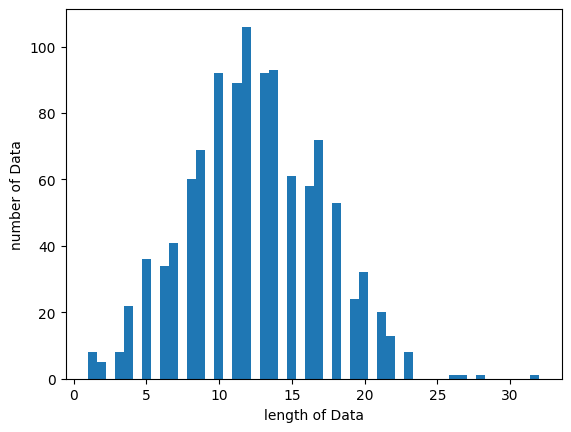

In [51]:
print( max(len(i) for i in sequences))
print( sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins = 50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [21]:
x_train = sequences[:num_train_data]
x_test = sequences[:num_train_data]

y_train = y_data[:num_train_data]
y_test = y_data[:num_train_data]

In [22]:
print(x_train[10])
print(y_train[10])

[63, 982, 285, 244, 79, 983, 984, 200, 985, 14, 80, 986, 299, 987, 988, 39, 11]
0


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Find the maximum length of sequences
max_len = max(max(len(l) for l in x_train), max(len(l) for l in x_validation), max(len(l) for l in x_test))

# # Pad sequences
# x_train = pad_sequences(x_train, maxlen=max_len)
# x_validation = pad_sequences(x_validation, maxlen=max_len)
# x_test = pad_sequences(x_test, maxlen=max_len)

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(770,)
(165,)
(165,)


In [9]:
print(x_train[:5])

221    저희는 네추럴 커피 같은 경우에는 93도 정도로 추천을 드리고, 물 온도를 헌이나 ...
235           그리고 원두 같은 경우에는 저희 같은 경우에는 싱글로리징 같은 경우에는.\n
433    그리고 산미, 그리고 복합성이 같이 잘 나와서 굉장히 청장하고 맛있는 아이스 브로잉...
599     필터는 리브와 충분히 접촉될 수 있도록 조금 여유를 두고 접어주시는 편이 좋습니다.\n
305    또 저희 커피를 내려드실 수 있는 레시피를 공유해 드리려고 합니다. 이번 영상에는 ...
Name: Sentence, dtype: object


In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train.tolist())
sequences = tokenizer.texts_to_sequences(x_train.tolist())

In [15]:
print(sequences[:5])

NameError: name 'sequence' is not defined

In [11]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)
print(word_index)

2553
{'수': 1, '같은': 2, '그리고': 3, '더': 4, '이': 5, '커피를': 6, '하겠습니다': 7, '됩니다': 8, '추출': 9, '물': 10, '때': 11, '한': 12, '물을': 13, '경우에는': 14, '잘': 15, '커피': 16, '있습니다': 17, '그래서': 18, '충분히': 19, '저희가': 20, '저희': 21, '드리퍼를': 22, '좀': 23, '총': 24, '추출이': 25, '조금': 26, '이번': 27, '지금': 28, '아이스': 29, '추출을': 30, '정도': 31, '다': 32, '하리오': 33, '때문에': 34, '주시면': 35, '커피는': 36, '제가': 37, '때는': 38, '있도록': 39, '있는': 40, '30초': 41, '1분': 42, '2분': 43, '번': 44, '안녕하세요': 45, '물이': 46, '린싱을': 47, '정도로': 48, '합니다': 49, '꼭': 50, '레시피를': 51, '온도는': 52, '사용하고': 53, '종이': 54, '너무': 55, '오늘': 56, '할': 57, '굉장히': 58, '감사합니다': 59, '되면': 60, '43': 61, '사용할': 62, '또': 63, '한번': 64, '이제': 65, '다시': 66, '것을': 67, '있어요': 68, '필터를': 69, '보다': 70, '브루잉': 71, '되겠습니다': 72, '있는지': 73, '많이': 74, '기준으로': 75, '1대': 76, '해주세요': 77, '게': 78, '그다음에': 79, '필터': 80, '소개해': 81, '30초가': 82, '서버에': 83, '추출한': 84, '것': 85, '60g': 86, '뜸은': 87, '에서': 88, '평평하게': 89, '시간은': 90, 'v': 91, '가지고': 92, '사용해서': 93, '돼요': 94, '있고': 95, '그냥':

In [12]:
print(sequences[:5])

[[149, 252, 16, 2, 14, 787, 48, 193, 604, 10, 253, 1614, 178, 788, 2, 14, 452, 193, 194], [3, 103, 2, 14, 21, 2, 14, 1615, 2, 14], [3, 605, 3, 789, 361, 15, 790, 58, 791, 254, 29, 1616, 25, 8], [255, 792, 19, 1617, 1, 39, 26, 606, 453, 1618, 793, 300], [63, 21, 6, 1619, 1, 40, 51, 301, 256, 49, 27, 794, 20, 195, 1620, 795, 796, 454, 93, 135, 21, 797, 798, 179, 362, 257, 799, 1, 73, 51, 301, 363]]


In [14]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=max_len)
x_validation = pad_sequences(x_validation, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

ValueError: invalid literal for int() with base 10: '저희는 네추럴 커피 같은 경우에는 93도 정도로 추천을 드리고, 물 온도를 헌이나 워시드 계열 같은 경우에는 95도로 추천을 드립니다.\n'

In [43]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

model = Sequential()
model.add(Embedding(vocab_size, 60))
model.add(SimpleRNN(60))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 60)          168120    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60)                7260      
                                                                 
 dense_7 (Dense)             (None, 1)                 61        
                                                                 
Total params: 175441 (685.32 KB)
Trainable params: 175441 (685.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
import tensorflow as tf

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience = 30)
history = model.fit(x_train, y_train, epochs=1000, batch_size=60, validation_data = (x_validation, y_validation),callbacks=[callback])

Epoch 1/1000
13/13 [==============================] - 3s 142ms/step - loss: 0.6526 - acc: 0.6156 - val_loss: 0.6585 - val_acc: 0.6061
Epoch 2/1000
13/13 [==============================] - 2s 119ms/step - loss: 0.5142 - acc: 0.8753 - val_loss: 0.5372 - val_acc: 0.7879
Epoch 3/1000
13/13 [==============================] - 2s 118ms/step - loss: 0.2790 - acc: 0.9403 - val_loss: 0.4633 - val_acc: 0.7818
Epoch 4/1000
13/13 [==============================] - 1s 97ms/step - loss: 0.1341 - acc: 0.9714 - val_loss: 0.4288 - val_acc: 0.7879
Epoch 5/1000
13/13 [==============================] - 1s 116ms/step - loss: 0.0829 - acc: 0.9779 - val_loss: 0.4463 - val_acc: 0.7939
Epoch 6/1000
13/13 [==============================] - 1s 110ms/step - loss: 0.0530 - acc: 0.9818 - val_loss: 0.4717 - val_acc: 0.8182
Epoch 7/1000
13/13 [==============================] - 1s 65ms/step - loss: 0.0444 - acc: 0.9883 - val_loss: 0.5137 - val_acc: 0.7879
Epoch 8/1000
13/13 [==============================] - 1s 74ms/st

In [46]:
_loss, _accr = model.evaluate(x_test, y_test)
print("\n 정확도: %.4f" % _accr)

6/6 [==============================] - 0s 5ms/step - loss: 0.5782 - acc: 0.8242

 정확도: 0.8242


In [5]:
import torch
from kobert import get_pytorch_kobert_model
input_ids = torch.LongTensor([[31, 51, 99], [15, 5, 0]])
input_mask = torch.LongTensor([[1, 1, 1], [1, 1, 0]])
token_type_ids = torch.LongTensor([[0, 0, 1], [0, 1, 0]])
model, vocab  = get_pytorch_kobert_model()
sequence_output, pooled_output = model(input_ids, input_mask, token_type_ids)
pooled_output.shape
vocab
 # Last Encoding Layer
sequence_output[0]

ModuleNotFoundError: No module named 'kobert'

In [1]:
# import
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm, tqdm_notebook
import gluonnlp as nlp

/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '


In [2]:
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [3]:
# GPU
device = torch.device("cuda:0")

In [14]:
dataset_train = nlp.data.TSVDataset("output.csv", field_indices=[0,1], num_discard_samples=0, field_separator=',')
dataset_test = nlp.data.TSVDataset(".cache/ratings_test.txt", field_indices=[1,2], num_discard_samples=1)

TypeError: 'str' object is not callable

In [110]:
dataset_train = nlp.data.TSVDataset("output_without_dquotes.csv", num_discard_samples=1)
dataset_train._field_separator = ','  # Set the field separator here
dataset_train._field_indices = [0, 1]

dataset_test = nlp.data.TSVDataset(".cache/ratings_test.txt", num_discard_samples=1)
dataset_test._field_separator = ','  # Set the field separator here
dataset_test._field_indices = [1, 2]


In [112]:
print(dataset_train[:10][0])
print(dataset_train[:10][1])
print(dataset_train[:10])

['"안녕하세요, 반갑습니다. 폰트 커피 양태은입니다.']
['",0']
[['"안녕하세요, 반갑습니다. 폰트 커피 양태은입니다.'], ['",0'], ['"이번에 제가 알려드릴 레시피는 아이스 브루윙, 커피 레시피입니다.'], ['",0'], ['"저희 브루윙 레시피의 중요한 점은 상대적으로 굵은 물줄기를 사용하시는 것과 추출 시간에 약 50% 이내로 푸어를 끝내는 것입니다.'], ['",0'], ['"조금 더 쉽게 말씀드리면 저희 커피는 대개 추출이 3분 전으로 종료되는데, 이때 푸어를 마지막으로 1분 30초에서 40초 정도에 끝내주시면 됩니다.'], ['",0'], ['"그럼 커피를 내리면서 자세히 설명해 드리겠습니다.'], ['",0']]


In [8]:
# Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [9]:
# pre-trained 모델 가져오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.
config.json: 100%|█████████████████████████████████████████████████████████████████████| 535/535 [00:00<00:00, 3.58MB/s]
pytorch_model.bin: 100%|█████████████████████████████████████████████████████████████| 369M/369M [00:06<00:00, 56.8MB/s]


NameError: name 'nlp' is not defined

In [21]:
import pandas as pd

# Read CSV file with pandas
df = pd.read_csv("output.csv", quoting=1)  # quoting=1 handles quotes around fields

# Remove double quotes from all columns
df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

# # Save the modified DataFrame back to a CSV file
df.to_csv("output_without_quotes.csv", index=False)


/tmp/ipykernel_4177/3665400552.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)


<h1>여기서부터 kobert시작</h1>

In [1]:
# import
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd
from collections import deque

/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '


In [2]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [3]:
# 경로 설정
PATH="./"
#device - GPU 설정
device = torch.device("cuda:0")

In [4]:
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [5]:
# class BERTSentenceTransform

class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

In [6]:
df = pd.read_csv("output_without_quotes.csv", quoting=1)

data_list = []
for q, label in zip(df['Sentence'], df['Label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [7]:
#train test split
dataset_train, dataset_test = train_test_split(data_list, test_size=0.2, random_state=0)

print(len(dataset_train))
print(len(dataset_test))

880
220


In [8]:
# class BERTDataset
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int64(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [9]:
# 세팅 파라미터
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 15
max_grad_norm = 1
log_interval = 200
learning_rate =  3e-5
max_non_improving_epochs = 3

In [10]:
# class BERTClassifier
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [11]:
#정의한 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [12]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

NameError: name 'train_dataloader' is not defined

In [12]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [13]:
# 테스트 데이터 로더
data_test = BERTDataset(dataset_test, 0, 1, tokenizer, vocab, max_len, True, False)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [14]:
# 데이터를 X, y로 나누기
X = [item[0] for item in dataset_train]
y = [item[1] for item in dataset_train]

best_val_acc = 0.0

# StratifiedKFold를 사용하여 인덱스 분할
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\nFold {fold + 1}/{kfold.get_n_splits()}")

    # 데이터 분할
    train_data = [data_list[i] for i in train_idx]
    val_data = [data_list[i] for i in val_idx]

    # 데이터 로더
    data_train = BERTDataset(train_data, 0, 1, tokenizer, vocab, max_len, True, False)
    data_val = BERTDataset(val_data, 0, 1, tokenizer, vocab, max_len, True, False)

    train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
    val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)

    # 모델 및 옵티마이저 초기화
    model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    t_total = len(train_dataloader) * num_epochs
    warmup_step = int(t_total * warmup_ratio)
    scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

    eval_acc = 0.0
    train_loss_li = []
    train_acc_li = []
    val_loss_li = []
    val_acc_li = []
    non_improving_count = 0
    best_model_state = None

    for e in range(num_epochs):
        train_acc = 0.0
        test_acc = 0.0

        model.train()
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
            optimizer.zero_grad()
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            optimizer.step()
            scheduler.step()
            train_acc += calc_accuracy(out, label)

            if batch_id % log_interval == 0:
                print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))

        print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
        train_loss_li.append(loss.data.cpu().numpy())
        train_acc_li.append(train_acc / (batch_id+1))

        model.eval()
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            test_acc += calc_accuracy(out, label)

        print("epoch {} validation loss {} validation acc {}".format(e+1, loss.data.cpu().numpy() ,test_acc / (batch_id+1)))

        val_loss_li.append(loss.data.cpu().numpy())
        val_acc_li.append(test_acc / (batch_id+1))

        if test_acc > eval_acc:
            eval_acc = test_acc
            non_improving_count = 0
            best_model_state = model.state_dict()
            torch.save(model, PATH + f'checkpoint_fold{fold}.pt')  # 해당 fold의 모델 저장
            torch.save(model.state_dict(), PATH + f'model_state_fold{fold}.pt')  # 해당 fold의 모델 state_dict 저장
            torch.save({
                'model': model.state_dict(),
                'optimizer': optimizer.state_dict()
            }, PATH + f'all_fold{fold}.tar')  # 해당 fold의 체크포인트 저장
        else:
            non_improving_count += 1

        if non_improving_count >= max_non_improving_epochs:
            print(f"No improvement for {max_non_improving_epochs} epochs. Early stopping.")
            break

    # 추가된 부분: 테스트 데이터에 대한 recall, f1-score 계산
    model.load_state_dict(best_model_state)  # 저장된 최적의 모델로 복원
    model.eval()

    all_preds = []
    all_labels = []

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)

        # 모델 예측
        out = model(token_ids, valid_length, segment_ids)
        _, preds = torch.max(out, 1)

        # 정확도 계산
        test_acc += calc_accuracy(out, label)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

    # recall, f1-score 계산
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')

    print(f"Fold {fold + 1}:Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Fold 1/5


  9%|███████▋                                                                            | 1/11 [00:01<00:11,  1.11s/it]

epoch 1 batch id 1 loss 0.7049440741539001 train acc 0.46875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.08it/s]


epoch 1 train acc 0.5198863636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.68it/s]


epoch 1 validation loss 0.7394201159477234 validation acc 0.6041666666666666


  9%|███████▋                                                                            | 1/11 [00:00<00:05,  1.97it/s]

epoch 2 batch id 1 loss 0.5762256979942322 train acc 0.75


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.68it/s]


epoch 2 train acc 0.7073863636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.78it/s]


epoch 2 validation loss 0.5379661917686462 validation acc 0.8854166666666666


  9%|███████▋                                                                            | 1/11 [00:00<00:05,  1.90it/s]

epoch 3 batch id 1 loss 0.4789164662361145 train acc 0.828125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.65it/s]


epoch 3 train acc 0.8352272727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.39it/s]


epoch 3 validation loss 0.3910291790962219 validation acc 0.8211805555555555


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.86it/s]

epoch 4 batch id 1 loss 0.40012142062187195 train acc 0.8125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.82it/s]


epoch 4 train acc 0.8934659090909091


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.50it/s]


epoch 4 validation loss 0.25545448064804077 validation acc 0.8194444444444445


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.79it/s]

epoch 5 batch id 1 loss 0.29448074102401733 train acc 0.90625


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.93it/s]


epoch 5 train acc 0.9303977272727273


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.63it/s]


epoch 5 validation loss 0.18132546544075012 validation acc 0.7934027777777778
No improvement for 3 epochs. Early stopping.


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.27it/s]
/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 1:Precision = 0.6847, Recall = 1.0000, F1-Score = 0.8128

Fold 2/5


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.03it/s]

epoch 1 batch id 1 loss 0.7009943127632141 train acc 0.546875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.96it/s]


epoch 1 train acc 0.5071022727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.88it/s]


epoch 1 validation loss 0.7014644742012024 validation acc 0.6614583333333334


  9%|███████▋                                                                            | 1/11 [00:00<00:06,  1.53it/s]

epoch 2 batch id 1 loss 0.6070520877838135 train acc 0.640625


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.51it/s]


epoch 2 train acc 0.7414772727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.91it/s]


epoch 2 validation loss 0.425292044878006 validation acc 0.9201388888888888


  9%|███████▋                                                                            | 1/11 [00:00<00:05,  1.79it/s]

epoch 3 batch id 1 loss 0.4732392728328705 train acc 0.8125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.68it/s]


epoch 3 train acc 0.8863636363636364


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.67it/s]


epoch 3 validation loss 0.19814452528953552 validation acc 0.8559027777777778


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.76it/s]

epoch 4 batch id 1 loss 0.3822648525238037 train acc 0.84375


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.95it/s]


epoch 4 train acc 0.8977272727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.23it/s]


epoch 4 validation loss 0.2193126529455185 validation acc 0.9548611111111112


  9%|███████▋                                                                            | 1/11 [00:00<00:05,  2.00it/s]

epoch 5 batch id 1 loss 0.3296426832675934 train acc 0.875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.69it/s]


epoch 5 train acc 0.8948863636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.16it/s]


epoch 5 validation loss 0.20181436836719513 validation acc 0.9375


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.57it/s]

epoch 6 batch id 1 loss 0.27216461300849915 train acc 0.890625


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.93it/s]


epoch 6 train acc 0.9417613636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.65it/s]


epoch 6 validation loss 0.1487387716770172 validation acc 0.9201388888888888


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.66it/s]

epoch 7 batch id 1 loss 0.24685867130756378 train acc 0.90625


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.93it/s]


epoch 7 train acc 0.953125


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.29it/s]


epoch 7 validation loss 0.11977105587720871 validation acc 0.90625
No improvement for 3 epochs. Early stopping.


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.73it/s]
/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 2:Precision = 0.9610, Recall = 0.9737, F1-Score = 0.9673

Fold 3/5


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.08it/s]

epoch 1 batch id 1 loss 0.3519638478755951 train acc 0.9375


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.96it/s]


epoch 1 train acc 0.9446022727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.76it/s]


epoch 1 validation loss 0.2554604709148407 validation acc 0.9791666666666666


  9%|███████▋                                                                            | 1/11 [00:00<00:06,  1.58it/s]

epoch 2 batch id 1 loss 0.22398412227630615 train acc 0.953125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.59it/s]


epoch 2 train acc 0.953125


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.98it/s]


epoch 2 validation loss 0.1603022813796997 validation acc 0.9409722222222222


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.98it/s]

epoch 3 batch id 1 loss 0.13833586871623993 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.99it/s]


epoch 3 train acc 0.9616477272727273


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.52it/s]


epoch 3 validation loss 0.11809253692626953 validation acc 0.9375


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.22it/s]

epoch 4 batch id 1 loss 0.1414417028427124 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.04it/s]


epoch 4 train acc 0.9616477272727273


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.02it/s]


epoch 4 validation loss 0.06448045372962952 validation acc 0.9375
No improvement for 3 epochs. Early stopping.


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.99it/s]
/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 3:Precision = 0.9367, Recall = 0.9737, F1-Score = 0.9548

Fold 4/5


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.02it/s]

epoch 1 batch id 1 loss 0.5331048369407654 train acc 0.828125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.89it/s]


epoch 1 train acc 0.8465909090909091


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.38it/s]


epoch 1 validation loss 0.4077312648296356 validation acc 0.984375


  9%|███████▋                                                                            | 1/11 [00:00<00:06,  1.59it/s]

epoch 2 batch id 1 loss 0.41766154766082764 train acc 0.9375


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.59it/s]


epoch 2 train acc 0.9602272727272727


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.62it/s]


epoch 2 validation loss 0.17489494383335114 validation acc 0.9739583333333334


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.99it/s]

epoch 3 batch id 1 loss 0.1760384738445282 train acc 0.9375


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.93it/s]


epoch 3 train acc 0.9644886363636364


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.99it/s]


epoch 3 validation loss 0.07599371671676636 validation acc 0.9305555555555555


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  2.69it/s]

epoch 4 batch id 1 loss 0.13217169046401978 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.95it/s]


epoch 4 train acc 0.9772727272727273


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s]


epoch 4 validation loss 0.0822712853550911 validation acc 0.9357638888888888
No improvement for 3 epochs. Early stopping.


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.26it/s]
/home/woong/virtualEnv/coffee/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 4:Precision = 0.9615, Recall = 0.9868, F1-Score = 0.9740

Fold 5/5


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.08it/s]

epoch 1 batch id 1 loss 0.9151598811149597 train acc 0.109375


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.98it/s]


epoch 1 train acc 0.30113636363636365


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.47it/s]


epoch 1 validation loss 0.618646502494812 validation acc 0.9722222222222222


  9%|███████▋                                                                            | 1/11 [00:00<00:06,  1.61it/s]

epoch 2 batch id 1 loss 0.5364415645599365 train acc 0.828125


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.58it/s]


epoch 2 train acc 0.921875


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.88it/s]


epoch 2 validation loss 0.1823844164609909 validation acc 0.9722222222222222


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.12it/s]

epoch 3 batch id 1 loss 0.18404746055603027 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.99it/s]


epoch 3 train acc 0.9502840909090909


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.36it/s]


epoch 3 validation loss 0.07726801931858063 validation acc 0.9791666666666666


  9%|███████▋                                                                            | 1/11 [00:00<00:04,  2.21it/s]

epoch 4 batch id 1 loss 0.1498614102602005 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.81it/s]


epoch 4 train acc 0.9573863636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.37it/s]


epoch 4 validation loss 0.07081420719623566 validation acc 0.9774305555555555


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.19it/s]

epoch 5 batch id 1 loss 0.15171226859092712 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.04it/s]


epoch 5 train acc 0.9573863636363636


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.10it/s]


epoch 5 validation loss 0.08975248783826828 validation acc 0.9704861111111112


  9%|███████▋                                                                            | 1/11 [00:00<00:03,  3.10it/s]

epoch 6 batch id 1 loss 0.15109407901763916 train acc 0.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.99it/s]


epoch 6 train acc 0.9701704545454546


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.20it/s]


epoch 6 validation loss 0.0818895623087883 validation acc 0.9600694444444445
No improvement for 3 epochs. Early stopping.


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.40it/s]

Fold 5:Precision = 0.9367, Recall = 0.9737, F1-Score = 0.9548


In [16]:
model = torch.load(PATH + 'checkpoint.pt')  # 전체 모델을 통째로 불러옴, 클래스 선언 필수
model.load_state_dict(torch.load(PATH + 'model_state.pt'))  # state_dict를 불러 온 후, 모델에 저장

checkpoint = torch.load(PATH + 'all.tar')   # dict 불러오기
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [15]:
def get_train_result():
    best_acc = 0
    best_model = 0
    for i in range(5):
        model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
        model.load_state_dict(torch.load(PATH + f'model_state_fold{i}.pt'))
        model.eval()

        all_preds = []
        all_labels = []


        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)

            # 모델 예측
            out = model(token_ids, valid_length, segment_ids)
            _, preds = torch.max(out, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label.cpu().numpy())

        # recall, f1-score 계산
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted', zero_division=1)
        accuracy = accuracy_score(all_labels, all_preds)
        if accuracy>best_acc:
            best_acc = accuracy
            best_model = i

        print(f"Fold {i + 1}:Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}, Accuracy = {accuracy:.4f}")

    return best_model

# 예측 함수
def predict(predict_sentence, best_model):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    all_test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)

    model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
    model.load_state_dict(torch.load(PATH + f'model_state_fold{best_model}.pt'))
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(all_test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

    out = model(token_ids, valid_length, segment_ids)

# 행복, 놀람, 분노, 공포, 혐오, 슬픔, 중립
    test_eval=[]
    for i in out:
        logits=i
        logits = logits.detach().cpu().numpy()

        if np.argmax(logits) == 0:
            test_eval.append("아무것도 안")
        elif np.argmax(logits) == 1:
            test_eval.append("추출이")

    print(test_eval[0] + " 느껴집니다.")

<h3>레시피와 관련된 문장을 분류하는지 확인해보기</h3>

In [16]:
#질문 무한반복하기! 0 입력시 종료
end = 1
best_model = get_train_result()
while end == 1 :
    sentence = input("추출 레시피를 입력해주세요 : ")
    if sentence == '0' :
        break
    predict(sentence, best_model)
    print("\n")

100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.53it/s]


Fold 1:Precision = 0.8736, Recall = 0.8727, F1-Score = 0.8731, Accuracy = 0.8727


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.98it/s]


Fold 2:Precision = 0.9697, Recall = 0.9682, F1-Score = 0.9684, Accuracy = 0.9682


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.11it/s]


Fold 3:Precision = 0.9737, Recall = 0.9727, F1-Score = 0.9729, Accuracy = 0.9727


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.15it/s]


Fold 4:Precision = 0.9709, Recall = 0.9682, F1-Score = 0.9685, Accuracy = 0.9682


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.09it/s]


Fold 5:Precision = 0.9529, Recall = 0.9455, F1-Score = 0.9463, Accuracy = 0.9455


추출 레시피를 입력해주세요 :  안녕하세요


아무것도 안 느껴집니다.




추출 레시피를 입력해주세요 :  이번 추출에서는 하리오 v60을 사용하여 파나마 하트만 게이샤를 추출해보겠습니다


추출이 느껴집니다.




추출 레시피를 입력해주세요 :  하리오 v60는 세라믹을 사용하고 있고 추출 전에 린싱과 예열을 해주는 것이 아주 중요합니다.


아무것도 안 느껴집니다.




추출 레시피를 입력해주세요 :  이번 추출에서는 원두 20g을 사용하여 추출할 예정이고 1:15비율로 진행하겠습니다


추출이 느껴집니다.




추출 레시피를 입력해주세요 :  처음에 추출을 시작하시면서 물을 푸어하기 전에 꼭 타이머를 먼저 시작해주셔야 합니다.


아무것도 안 느껴집니다.




추출 레시피를 입력해주세요 :  처음에는 40초동안 40g의 물로 뜸을 들여주세요


추출이 느껴집니다.




추출 레시피를 입력해주세요 :  이후 40초가 되면 180g을 추가로 부어줍니다


추출이 느껴집니다.




추출 레시피를 입력해주세요 :  마지막으로 1분 30초가 되면 나머지 80g을 추가로 추출해주겠습니다.


추출이 느껴집니다.




추출 레시피를 입력해주세요 :  0
